In [1]:
# First autoecoder classification
# from https://machinelearningmastery.com/autoencoder-for-classification/

In [60]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [61]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10,\
                           n_redundant=90, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
# number of input columns
n_inputs = X.shape[1]

(1000, 100) (1000,)


In [70]:
print(X[0],y[0:10])

[  5.83689773   9.48106626  -5.92914747  -7.82151576  -2.22453167
   3.24925124   2.15594557  -0.46799647  -1.25246432  -0.49995106
   3.78505142  -0.77075038  -3.17679888  -1.77249333  -2.09592625
   9.65435399   2.82563057  -6.56849576  -5.10718989   7.71941227
   0.12683247   2.82880781   6.17280078  -4.36957215  -1.59321296
   0.56590662  -6.41206747   3.04305773   0.7263226    1.64614409
   5.45274412  -5.58440186   3.96875142  -1.23695275   3.0062571
   4.92968678   4.21240208  -8.88919389  -1.07853488   2.65771081
  -2.34433743  -2.510802     5.52202794   3.69455395   3.48952688
   0.70533154  -8.94715742  -4.22278654  -0.22471273   0.30838571
   2.58117055  -0.31636206   4.51306921   1.55461939   3.18986208
   0.70959555  -6.58348566   0.54916767  -5.88338193  -2.04299324
   1.78167828   6.88576894   1.71056973   2.7168235    3.64663557
  -2.75877244  -6.91255754  -1.34518683  -4.01340193  -1.99442459
  -2.07334021  -4.13586603  -0.33292776  -3.47482927  -5.00557214
   0.637340

In [63]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [64]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

#   --------------------------------------  PART that makes the change, the bottleneck  size
# bottleneck 
#n_bottleneck = n_inputs
#bottleneck = Dense(n_bottleneck)(e)

# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

In [65]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [66]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [67]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))


Epoch 1/200
42/42 - 0s - loss: 0.2328 - val_loss: 0.2110
Epoch 2/200
42/42 - 0s - loss: 0.0388 - val_loss: 0.1288
Epoch 3/200
42/42 - 0s - loss: 0.0249 - val_loss: 0.0671
Epoch 4/200
42/42 - 0s - loss: 0.0193 - val_loss: 0.0352
Epoch 5/200
42/42 - 0s - loss: 0.0166 - val_loss: 0.0229
Epoch 6/200
42/42 - 0s - loss: 0.0138 - val_loss: 0.0153
Epoch 7/200
42/42 - 0s - loss: 0.0137 - val_loss: 0.0131
Epoch 8/200
42/42 - 0s - loss: 0.0121 - val_loss: 0.0087
Epoch 9/200
42/42 - 0s - loss: 0.0110 - val_loss: 0.0096
Epoch 10/200
42/42 - 0s - loss: 0.0099 - val_loss: 0.0057
Epoch 11/200
42/42 - 0s - loss: 0.0098 - val_loss: 0.0067
Epoch 12/200
42/42 - 0s - loss: 0.0097 - val_loss: 0.0091
Epoch 13/200
42/42 - 0s - loss: 0.0090 - val_loss: 0.0064
Epoch 14/200
42/42 - 0s - loss: 0.0090 - val_loss: 0.0050
Epoch 15/200
42/42 - 0s - loss: 0.0086 - val_loss: 0.0049
Epoch 16/200
42/42 - 0s - loss: 0.0084 - val_loss: 0.0040
Epoch 17/200
42/42 - 0s - loss: 0.0079 - val_loss: 0.0046
Epoch 18/200
42/42 - 0s

Epoch 142/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0015
Epoch 143/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0012
Epoch 144/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0019
Epoch 145/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0018
Epoch 146/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0027
Epoch 147/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 148/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0014
Epoch 149/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0023
Epoch 150/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0017
Epoch 151/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0016
Epoch 152/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0016
Epoch 153/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0010
Epoch 154/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0018
Epoch 155/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0014
Epoch 156/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0014
Epoch 157/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0015
Epoch 158/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.00

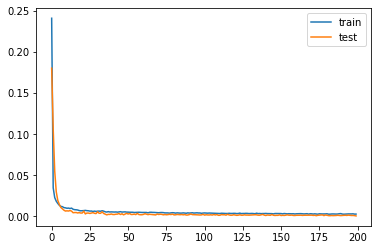

In [53]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [54]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
#plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

### Encoder as Data Preparation for Predictive Model
In this section, we will use the trained encoder from the autoencoder to compress input data and train a different predictive model.

First, let’s establish a baseline in performance on this problem. This is important as if the performance of a model is not improved by the compressed encoding, then the compressed encoding does not add value to the project and should not be used.

We can train a logistic regression model on the training dataset directly and evaluate the performance of the model on the holdout test set.

The complete example is listed below.

In [55]:
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import load_model
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8939393939393939


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# load the model from file
encoder = load_model('encoder.h5')

In [56]:

# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)


In [57]:
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
#encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9424242424242424


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
## From the https://pythonprogramming.net/autoencoders-tutorial/

In [80]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

In [81]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

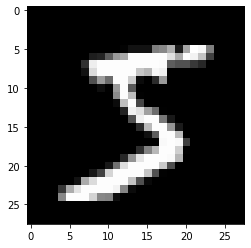

In [83]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")


In [89]:
print(x_train[0].shape)

(28, 28)


In [91]:
x_train.shape

(60000, 28, 28)

In [94]:
#https://keras.io/api/layers/core_layers/input/
encoder_input = keras.Input(shape=(28, 28, 1), name='img')

In [97]:
#flattening the data
x = keras.layers.Flatten()(encoder_input)


In [98]:
# compression (bottleneck layer)
encoder_output = keras.layers.Dense(64, activation="relu")(x)
#That's it. So all this model does is take input of 28x28, flatten to 
#a vector of 784 values, then go to a fully-connected dense layer 
#of a mere 64 values.

In [99]:
#With that, we're actually done with our encoder already:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')


In [100]:
#Now, we want to define our decoder. 
#The decoder's job is going to be to take this vector of 64 
# (at the moment) values and then "decompress" it back to the 
#original image.
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)

In [101]:
#Finally, our image isn't a vector of 784 values, it's a 2D array 
#of 28 x 28 values

decoder_output = keras.layers.Reshape((28, 28, 1))(x)

In [102]:
#Now that the model architecture is done, we'll set an optimizer:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

In [103]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

In [104]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [105]:
#We'll now compile our model with the optimizer and a loss metric. 
#We'll use mean squared error for loss (mse).

autoencoder.compile(opt, loss='mse')

In [106]:
epochs=3

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0209 - val_loss: 0.0147
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/AE-1.model/assets
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0139 - val_loss: 0.0133
INFO:tensorflow:Assets written to: models/AE-2.model/assets
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0129 - val_loss: 0.0126
INFO:tensorflow:Assets written to: models/AE-3.model/assets


In [107]:
# First, let's look at an encoded example, because it's cool:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

(64,)
[1.311414   0.5080854  0.6708172  0.53078485 0.         0.2421467
 1.1647054  1.4037511  1.5170581  0.5638564  1.7137744  1.697468
 2.554486   1.4112358  0.7545754  2.4015262  0.         0.08490559
 1.5636034  1.033664   1.3777997  0.8299916  2.8062398  2.189281
 1.3204079  0.80245745 1.1541886  1.300938   0.22815503 1.9035292
 1.7922783  0.5608642  2.3317666  1.4998709  1.1250737  1.0643752
 0.1288506  0.31012052 1.0668097  0.         2.383809   1.6380063
 0.9468849  0.         1.2931417  1.201523   1.0478566  2.5152242
 3.2169785  0.9224385  1.3170872  1.1829087  0.6573962  0.68930906
 1.7454548  0.4598354  0.         0.86505574 1.2220619  1.4632474
 0.         2.7139387  2.2555754  0.24778247]


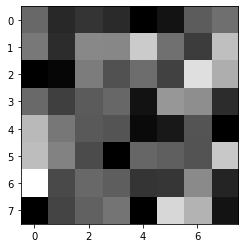

In [109]:
print(example[0].shape)
print(example[0])
plt.imshow(example[0].reshape((8,8)), cmap="gray")

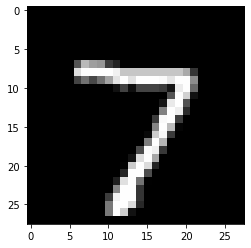

In [110]:
#That number was:
plt.imshow(x_test[0], cmap="gray")

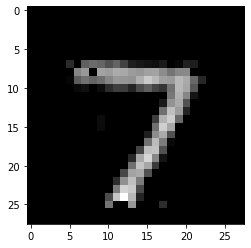

In [111]:
# AFTER THE AUTOENCODER IT WAS:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0], cmap="gray")

In [112]:
#Using OpenCV, we can quickly cycle through a bunch of 
#examples by doing:

for d in x_test[:5]:  # just show 5 examples, feel free to show all or however many you want!

    ae_out = autoencoder.predict([ d.reshape(-1, 28, 28, 1) ])
    img = ae_out[0]

    cv2.imshow("decoded",img)
    cv2.imshow("original",np.array(d))
    cv2.waitKey(1000)  # wait 1000ms, 1 second, and then show the next.